- 출처 : 누구나 파이썬 통계분석

# 통계적 추정

#### 점추정 : 추정하고 싶은 모평균이나 모분산이라는 모수를 하나의 수치로 추정 
#### 구간추정 : 구간으로 모수를 추정하는 방법

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

%precision 3
%matplotlib inline

In [2]:
df = pd.read_csv('./data/score.csv')
scores = np.array(df['score'])

In [3]:
df.shape

(400, 1)

In [4]:
p_mean = np.mean(scores)
p_var = np.var(scores)

p_mean, p_var

(69.53, 206.6691)

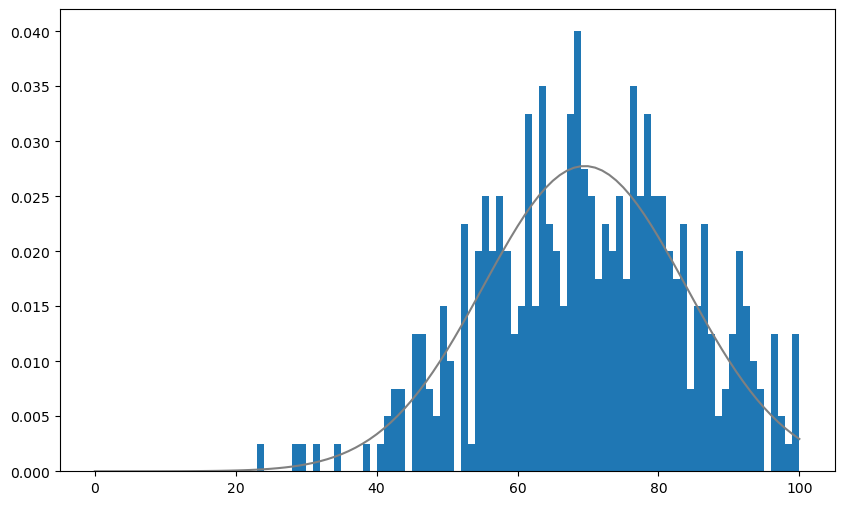

In [5]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.arange(101)
rv = stats.norm(p_mean, np.sqrt(p_var))
ax.plot(xs, rv.pdf(xs), color='gray')
ax.hist(scores, bins=100, range=(0, 100), density=True)

plt.show()

In [6]:
np.random.seed(0)
n = 20
sample = np.random.choice(scores, n)
sample

array([49, 60, 72, 86, 52, 61, 77, 91, 80, 56, 69, 67, 90, 56, 75, 79, 60,
       79, 68, 81], dtype=int64)

In [7]:
np.random.seed(1111)
n_samples = 10000
samples = np.random.choice(scores, (n_samples, n))

In [8]:
samples.shape

(10000, 20)

In [9]:
scores.size

400

## 점추정

#### 추정하고 싶은 모평균이나 모분산이라는 모수를 하나의 수치로 추정

### 모평균의 점추정

In [10]:
for i in range(5):
    s_mean = np.mean(samples[i])
    print(f'{i+1}번째 표본평균: {s_mean:.3f}')

1번째 표본평균: 67.000
2번째 표본평균: 72.850
3번째 표본평균: 69.200
4번째 표본평균: 64.450
5번째 표본평균: 72.650


In [11]:
samples.shape

(10000, 20)

sample_means.shape

In [13]:
a = np.array([[1, 2], [3, 4]])

In [14]:
a

array([[1, 2],
       [3, 4]])

In [15]:
np.sum(a, axis=0)

array([4, 6])

In [16]:
sample_means = np.mean(samples, axis=1)
np.mean(sample_means)

69.53799999999998

In [17]:
sample_means.shape

(10000,)

In [18]:
np.mean(np.random.choice(scores, int(1e6)))

69.542954

69.53

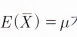

In [19]:
sample

array([49, 60, 72, 86, 52, 61, 77, 91, 80, 56, 69, 67, 90, 56, 75, 79, 60,
       79, 68, 81], dtype=int64)

In [20]:
s_mean = np.mean(sample)
s_mean

70.4

### 모분산의 점추정

In [21]:
for i in range(5):
    s_var = np.var(samples[i])
    print(f'{i+1}번째 표본분산: {s_var:.3f}')

1번째 표본분산: 116.800
2번째 표본분산: 162.928
3번째 표본분산: 187.060
4번째 표본분산: 149.148
5번째 표본분산: 111.528


In [22]:
sample_vars = np.var(samples, axis=1)
np.mean(sample_vars)

196.34417850000003

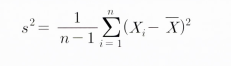

* 실제 모분산 : 206.6691

* 불편분산

In [23]:
sample_u_vars = np.var(samples, axis=1, ddof=1)
np.mean(sample_u_vars)

206.67808263157895

206.6691

In [24]:
np.var(np.random.choice(scores, int(1e6)), ddof=1)

207.08336592317

In [25]:
u_var = np.var(sample, ddof=1)
u_var

158.25263157894742

* 불편성 : 기대값이 추측하기 원하는 모수가 되는 성질 
* 일치성 : 표본 크기를 키우면서 추측하기 원하는 모수에 수렴하는 성질 

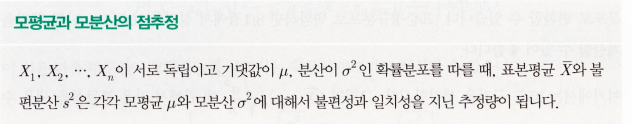

## 구간추정

### 정규분포의 모평균(분산을 알고 있는)의 구간추정

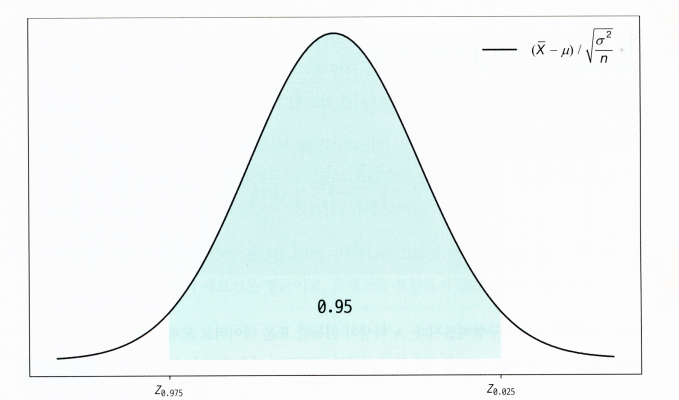

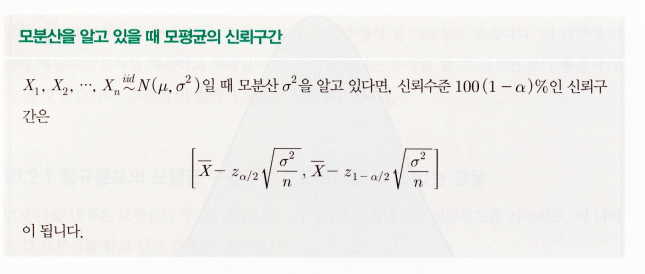

In [26]:
p_mean

69.53

In [27]:
rv = stats.norm()
lcl = s_mean - rv.isf(0.025) * np.sqrt(p_var/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(p_var/n)

lcl, ucl

(64.09956018535247, 76.70043981464754)

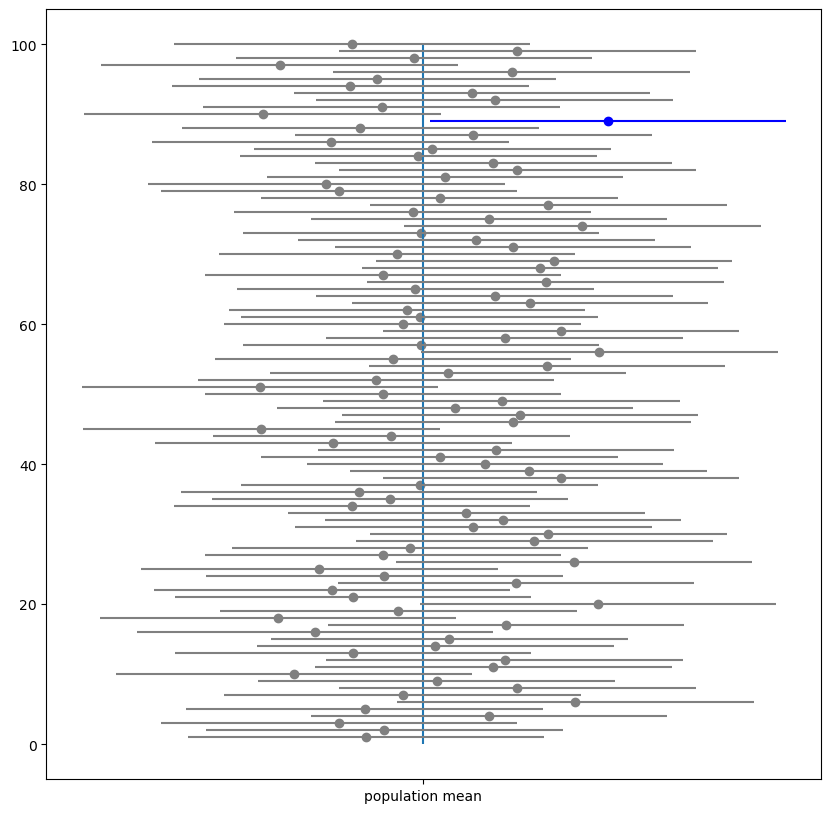

In [28]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

rv = stats.norm()
n_samples = 100
ax.vlines(p_mean, 0, 100)
for i in range(n_samples):
    sample_ = samples[i]
    s_mean_ = np.mean(sample_)
    lcl = s_mean_ - rv.isf(0.025) * np.sqrt(p_var/n)
    ucl = s_mean_ - rv.isf(0.975) * np.sqrt(p_var/n)
    if lcl <= p_mean <= ucl:
        ax.scatter(s_mean_, n_samples-i, color='gray')
        ax.hlines(n_samples-i, lcl, ucl, color='gray')
    else:
        ax.scatter(s_mean_, n_samples-i, color='b')
        ax.hlines(n_samples-i, lcl, ucl, color='b')
ax.set_xticks([p_mean])
ax.set_xticklabels(['population mean'])

plt.show()

In [29]:
samples.shape

(10000, 20)

In [30]:
rv = stats.norm()
cnt = 0

for sample_ in samples:
    s_mean_ = np.mean(sample_)
    lcl = s_mean_ - rv.isf(0.025) * np.sqrt(p_var/n)
    ucl = s_mean_ - rv.isf(0.975) * np.sqrt(p_var/n)
    if lcl <= p_mean <= ucl:
        cnt += 1
cnt / len(samples)

0.951

In [32]:
lcl

64.89956018535247

In [33]:
ucl

77.50043981464754